<a href="https://colab.research.google.com/github/krsha-nit/PyTorch/blob/main/3_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load the data
2. Build the model
3. Train the model
4. Evaluate the model
5. Make predictions

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Load the data
## using the torch vision to download the builtin datasets
train_dataset = torchvision.datasets.MNIST(
    root=".",
    train=True,
    transform = transforms.ToTensor(),
    download = True
)

100%|██████████| 9912422/9912422 [00:00<00:00, 168014577.49it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 111031800.02it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 46027695.56it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22229321.78it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [4]:
test_dataset = torchvision.datasets.MNIST(
    root=".",
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

In [5]:
train_dataset.data.shape, test_dataset.data.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [6]:
train_dataset.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [7]:
train_dataset.data.min(),train_dataset.data.max()

(tensor(0, dtype=torch.uint8), tensor(255, dtype=torch.uint8))

In [8]:
train_dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [9]:
# 2. create the model

## model
model = nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,10) ## no need for final softmax. Why??
)
## loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [10]:
## using cuda
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [11]:
## for batch gradient descent, will use data loader : !! important go through it !!
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [12]:
# HW: what does the data loader do?
# maps the values to (0,1)
# makes the data of shape=(batch_size,color,height,widht)
tmp_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=1,
                                         shuffle=True)
for X,y in tmp_loader:
  print(X)
  print(X.shape)
  print(y.shape)
  break

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [15]:
train_dataset.transform(train_dataset.data.numpy()).min(), train_dataset.transform(train_dataset.data.numpy()).max()

(tensor(0.), tensor(1.))

In [18]:
# 3. train the model

n_epochs = 10
## losses
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
for epoch in range(n_epochs):
  train_loss = []
  for inputs, targets in train_loader:
    ## move data to GPU
    inputs, targets = inputs.to(device), targets.to(device)
    ## reshape the input
    inputs = inputs.view(-1,784)
    ## zero the parameter grads
    optimizer.zero_grad()
    ## forward pass
    outputs = model(inputs)
    loss = criterion(outputs,targets)
    ## backward pass and optimize
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())

  ## mean of losses for all batches
  train_loss = np.mean(train_loss)

  test_loss = []
  for inputs,targets in test_loader:
    inputs,targets = inputs.to(device),targets.to(device)
    inputs = inputs.view(-1,784)
    outputs = model(inputs)
    loss = criterion(outputs,targets)
    loss.backward()
    optimizer.step()
    test_loss.append(loss.item())
  test_loss = np.mean(test_loss)

  ## saving losses
  train_losses[epoch] = train_loss
  test_losses[epoch] = test_loss

  print(f"Epoch {epoch+1}/{n_epochs}, Train loss: {train_loss:.4f}, Test loss: {test_loss:.4f}")


Epoch 1/10, Train loss: 0.2417, Test loss: 0.0892
Epoch 2/10, Train loss: 0.2203, Test loss: 0.1700
Epoch 3/10, Train loss: 0.3770, Test loss: 0.1630
Epoch 4/10, Train loss: 0.3161, Test loss: 0.1112
Epoch 5/10, Train loss: 0.2673, Test loss: 0.0856
Epoch 6/10, Train loss: 0.2382, Test loss: 0.0495
Epoch 7/10, Train loss: 0.1993, Test loss: 0.0740
Epoch 8/10, Train loss: 0.2469, Test loss: 0.0431
Epoch 9/10, Train loss: 0.1957, Test loss: 0.0324
Epoch 10/10, Train loss: 0.1750, Test loss: 0.0628


In [19]:
# 5. predictions
## train
n_correct = 0.
n_total = 0.
for inputs, targets in train_loader:
  ## move data to GPU
  inputs,targets = inputs.to(device),targets.to(device)
  ## reshape
  inputs = inputs.view(-1,784)
  ## forward pass
  outputs = model(inputs)
  ## get predictions !!important-- torch.max will return both max and argmax!!
  _,predictions = torch.max(outputs,1)
  ## update counts
  n_correct += (predictions==targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct/n_total

## test
n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
  ## move data to GPU
  inputs,targets = inputs.to(device),targets.to(device)
  ## reshape
  inputs = inputs.view(-1,784)
  ## forward pass
  outputs = model(inputs)
  ## get predictions !!important-- torch.max will return both max and argmax!!
  _,predictions = torch.max(outputs,1)
  ## update counts
  n_correct += (predictions==targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct/n_total
print(f"Train accuracy: {train_acc}, Test accuracy: {test_acc}")

Train accuracy: 0.8980666666666667, Test accuracy: 0.9334


In [25]:
# 4. Evaluation - plotting the confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix without normalization")
  print(cm)
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt = ".2f" if normalize else 'd'
  thresh = cm.max()/2.

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment="center",
             color="white" if cm[i,j]>thresh else "black")

  plt.tight_layout()
  plt.ylabel("True Label")
  plt.xlabel("Predicted Label")

Confusion matrix without normalization
[[ 978    0    0    0    0    0    0    0    1    1]
 [   0 1134    1    0    0    0    0    0    0    0]
 [   1    0 1027    0    0    0    0    2    2    0]
 [   3    0    2  996    0    2    0    1    1    5]
 [   2    2    1    0  770    0    0    0    0  207]
 [  16    1    1   57    0  741    3    0   20   53]
 [  51    8    7    0    2    0  884    0    6    0]
 [   5    7    3    4    0    0    0  861    5  143]
 [   9    2    3    2    1    0    0    0  939   18]
 [   2    1    0    1    1    0    0    0    0 1004]]


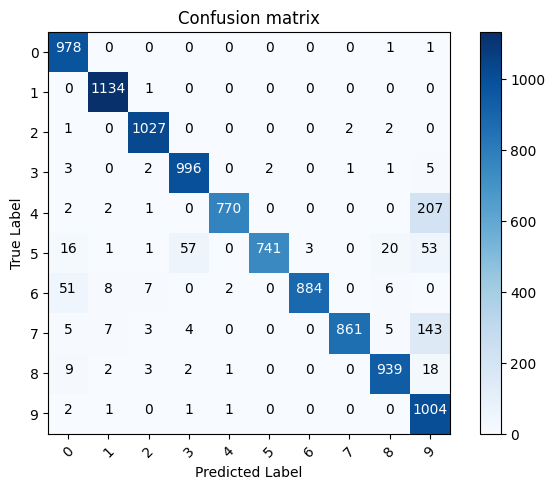

In [26]:
## plotting confusion matrix
x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
p_test = np.array([])
for inputs, targets in test_loader:
  inputs=inputs.to(device)
  inputs=inputs.view(-1,784)
  outputs=model(inputs)
  _,predictions = torch.max(outputs,1)
  p_test = np.concatenate((p_test,predictions.cpu().numpy()))
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm,list(range(10)))

Text(0.5, 1.0, 'True Label: 4, Predicted: 9.0')

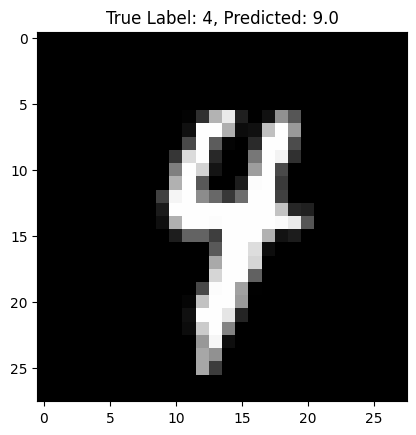

In [29]:
# checking misclassified examples
misclassified_idx = np.where(p_test!=y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title(f"True Label: {y_test[i]}, Predicted: {p_test[i]}")

Text(0.5, 1.0, 'True Label: 5, Predicted: 9.0')

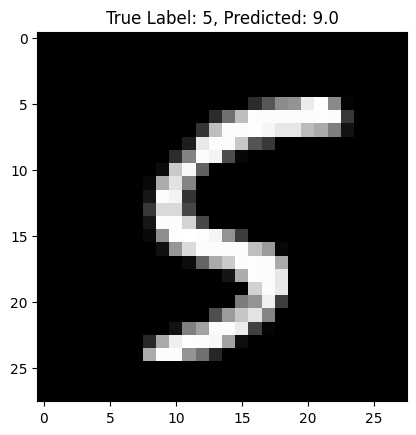

In [30]:
misclassified_idx = np.where(p_test!=y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title(f"True Label: {y_test[i]}, Predicted: {p_test[i]}")